#                                             MagicBricks.csv Question(ii)


NAME = Mayank Chandra Joshi

Roll No. = CSC/20/31

University Roll No.= 20059570023


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('MagicBricks.csv')
df = df.dropna()
df.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0
5,1300.0,4,3.0,Semi-Furnished,Rohini Sector 24,1.0,15500000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [3]:
df.describe()

,Area,BHK,Bathroom,Parking,Price,Per_Sqft
count,1005.000000,1005.000000,1005.000000,1005.000000,1.005000e+03,1005.000000
mean,1504.301968,2.791045,2.575124,1.697512,2.224030e+07,15663.630846
std,1729.104830,0.961469,1.088503,3.223118,2.771744e+07,21170.160448
min,28.000000,1.000000,1.000000,1.000000,1.000000e+06,1259.000000
25%,770.000000,2.000000,2.000000,1.000000,5.130000e+06,6364.000000
50%,1150.000000,3.000000,2.000000,1.000000,1.400000e+07,11363.000000
75%,1700.000000,3.000000,3.000000,2.000000,2.700000e+07,18000.000000
max,24300.000000,7.000000,7.000000,39.000000,2.400000e+08,183333.000000


In [4]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Identify the outliers
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))

# Remove the outliers
df = df[~outliers.any(axis=1)]

C:\Users\mayan\AppData\Local\Temp\ipykernel_13664\3193164777.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))


In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Type'] = le.fit_transform(df['Type'])
df['Furnishing'] = le.fit_transform(df['Furnishing'])
df['Transaction'] = le.fit_transform(df['Transaction'])
df['Status'] = le.fit_transform(df['Status'])

In [6]:
df.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
1,750.0,2,2.0,1,"J R Designers Floors, Rohini Sector 24",1.0,5000000,1,0,0,6667.0
2,950.0,2,2.0,0,"Citizen Apartment, Rohini Sector 13",1.0,15500000,1,1,0,6667.0
3,600.0,2,2.0,1,Rohini Sector 24,1.0,4200000,1,1,1,6667.0
4,650.0,2,2.0,1,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,1,0,1,6667.0
5,1300.0,4,3.0,1,Rohini Sector 24,1.0,15500000,1,0,1,6667.0


In [7]:
X = df[['Bathroom','BHK','Type',"Parking","Furnishing","Area",'Per_Sqft',"Transaction","Status"]]
Y = df["Price"]

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [9]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [10]:
Y_pred = lr.predict(X_test)

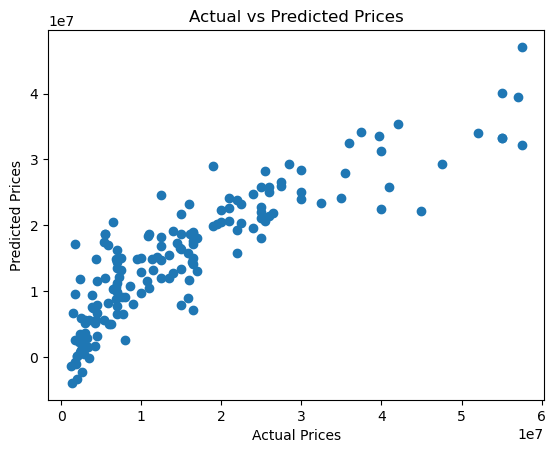

In [11]:
plt.scatter(Y_test, Y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

In [12]:
from sklearn.metrics import mean_squared_error, r2_score
print('Mean Squared Error: ', mean_squared_error(Y_test, Y_pred))
print('R-squared Value: ', r2_score(Y_test, Y_pred))

Mean Squared Error:  47253913101253.77
R-squared Value:  0.7420722061368374


In [13]:
new_house1 = [[2,3,0,1,1,1000,7000,1,1]]
print('Predicted Price for New House: $', lr.predict(new_house1)[0])

Predicted Price for New House: $ 8233341.129747648


c:\Users\mayan\.conda\envs\myenv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
